# **Lesson 02 : Data Mining Pipeline and Preprocessing**

### **1.Import Library**

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

### **2. Get Data**

##### **2.1 Get Data**

In [2]:
# Mount driver on colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.mkdir('Lesson 2')
path_lesson = os.path.join('/content', 'Lesson 2')
os.chdir(path_lesson)

In [4]:
!pwd

/content/Lesson 2


In [5]:
# Unzip dataset vào thư mục 'Lesson 2'
import zipfile
path = '/content/drive/MyDrive/Colab Notebooks/Datasets'
data_path = os.path.join(path, 'AI Specialist Lesson 02.zip')
with zipfile.ZipFile(data_path, 'r') as zip_file:
  zip_file.extractall(path_lesson)

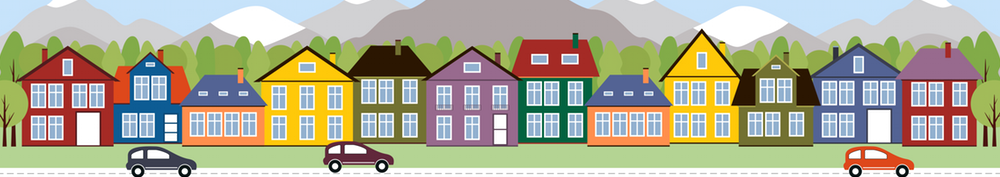

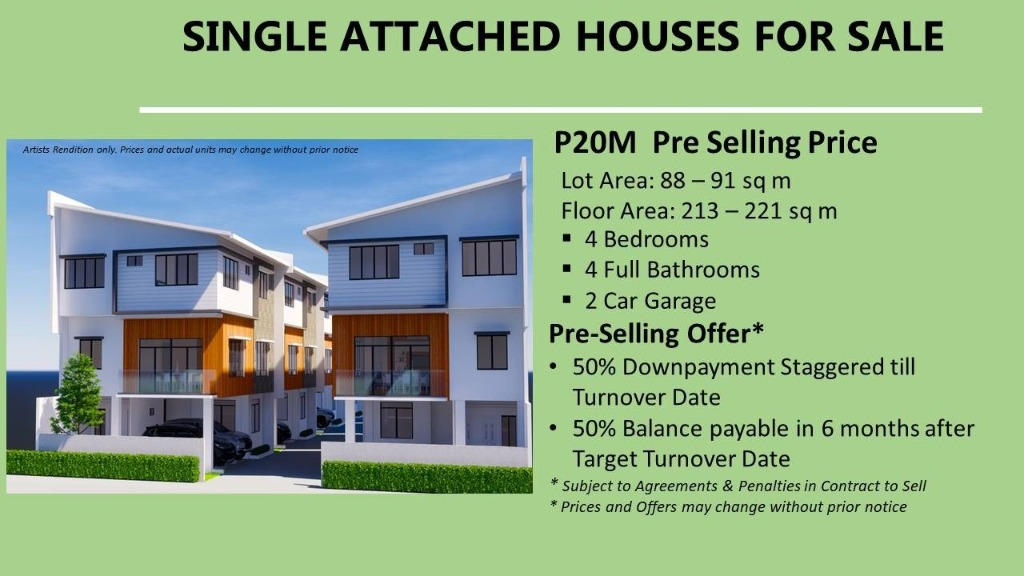

In [6]:
from IPython.display import display, Image
display(Image(filename='AI Specialist Lesson 02/House Price Prediction.png'))
display(Image(filename='AI Specialist Lesson 02/House Price.jpg'))

In [7]:
# Read data
data = pd.read_csv('AI Specialist Lesson 02/House Price/train.csv')
display(data.head())
print(data.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 81)


##### **2.2 Describe Data**

In [8]:
data.describe(include=np.number)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
data.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [10]:
data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [11]:
data.describe(percentiles=[.5, .65, .85])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
65%,949.350000,60.000000,75.000000,10624.350000,7.000000,6.000000,1993.000000,2000.000000,80.000000,593.350000,0.000000,676.000000,1144.000000,1242.700000,573.350000,0.000000,1651.350000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,1996.000000,2.000000,531.350000,125.350000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2009.000000,187500.000000
85%,1241.150000,90.000000,90.000000,13161.100000,8.000000,7.000000,2005.000000,2006.000000,262.350000,929.450000,0.000000,1010.300000,1485.150000,1572.150000,870.150000,0.000000,1987.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,8.000000,1.000000,2005.000000,2.000000,672.000000,216.000000,105.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2009.000000,250000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### **3. Preprocessing Data**

>**Tạo 1 dataframe mới, chứa thông tin về phần trăm số giá trị null trong mỗi cột của data.**

In [12]:
# The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

def find_missing_percent(data):
  miss_df = pd.DataFrame({'ColumnNames':[], 'TotalMissingValues':[], 'PercentMissing':[]})
  for col in data.columns:
    missing_info = pd.Series({'ColumnNames': col,'TotalMissingValues': data[col].isnull().sum()})
    miss_df = pd.concat([miss_df, missing_info.to_frame().T], ignore_index=True)
  miss_df = miss_df[miss_df['TotalMissingValues']>0].reset_index(drop=True)
  miss_df['PercentMissing'] = 100*(miss_df['TotalMissingValues']/data.shape[0])
  return miss_df

In [13]:
miss_df = find_missing_percent(data)
display(miss_df)

,ColumnNames,TotalMissingValues,PercentMissing
0,LotFrontage,259,17.739726
1,Alley,1369,93.767123
2,MasVnrType,8,0.547945
3,MasVnrArea,8,0.547945
4,BsmtQual,37,2.534247
5,BsmtCond,37,2.534247
6,BsmtExposure,38,2.60274
7,BsmtFinType1,37,2.534247
8,BsmtFinType2,38,2.60274
9,Electrical,1,0.068493


>**Drop các cột (các feature) có số lượng missing quá cao.**
* Với các cột (feature) có missing quá cao thì có xử lý được cũng gần như vô nghĩa vì khi đó nó cũng không có ảnh hưởng gì tới đặc trưng của data. Vì thế ta drop các **cột (feature)** này.

In [14]:
data = data.drop('Id', axis=1)
display(data.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
UselessCols = miss_df[miss_df['PercentMissing']>60]['ColumnNames']
print(UselessCols)

1           Alley
16         PoolQC
17          Fence
18    MiscFeature
Name: ColumnNames, dtype: object


In [16]:
data01 = data.drop(UselessCols, axis=1)
miss_df0 = find_missing_percent(data01)
display(miss_df0)

print(data.shape)
print(data01.shape)

,ColumnNames,TotalMissingValues,PercentMissing
0,LotFrontage,259,17.739726
1,MasVnrType,8,0.547945
2,MasVnrArea,8,0.547945
3,BsmtQual,37,2.534247
4,BsmtCond,37,2.534247
5,BsmtExposure,38,2.60274
6,BsmtFinType1,37,2.534247
7,BsmtFinType2,38,2.60274
8,Electrical,1,0.068493
9,FireplaceQu,690,47.260274


(1460, 80)
(1460, 76)


### **4. Approach**
* Approach 01: Remove any rows contain missing values.
* Approach 02: Impute missing with global Statistics: Mean, Median, Mode.
* Approach 03: Impute missing by Group using group statistics: Mean, Median, Mode.
* Approach 04: Impute missing using Machine Learning (XGBoost).
* Approach 05: Impute missing using Mice.

##### **4.1 Approach 01: Remove any rows contain missing values**
* Remove tất cả các hàng (các samplers), có chứa missing.

In [17]:
def listwise_detection(data):
  for col in data.columns:
    condition = data[col].isnull()
    null_index = data[col][condition].index
    data = data.drop(null_index, axis=0)
  return data

In [18]:
data_app01 = listwise_detection(data01)
display(data_app01.head())
print(data_app01.shape)
print(data01.shape)
miss_df01 = find_missing_percent(data_app01)
display(miss_df01)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000


(583, 76)
(1460, 76)


,ColumnNames,TotalMissingValues,PercentMissing


##### **4.2 Approach 02: Impute missing with global Statistics: Mean, Median, Mode**
* Thay thế missing bằng các giá trị thống kê của toàn data. Các cột có chứa missing, để tìm ra giá trị phù hợp thay thế ta sẽ cần phải thống kê các giá trị đặc trưng của toàn dải giá trị trên cột này.
* Với các cột loại number sử dụng mean hoặc median, các cột loại category sử dụng mode.

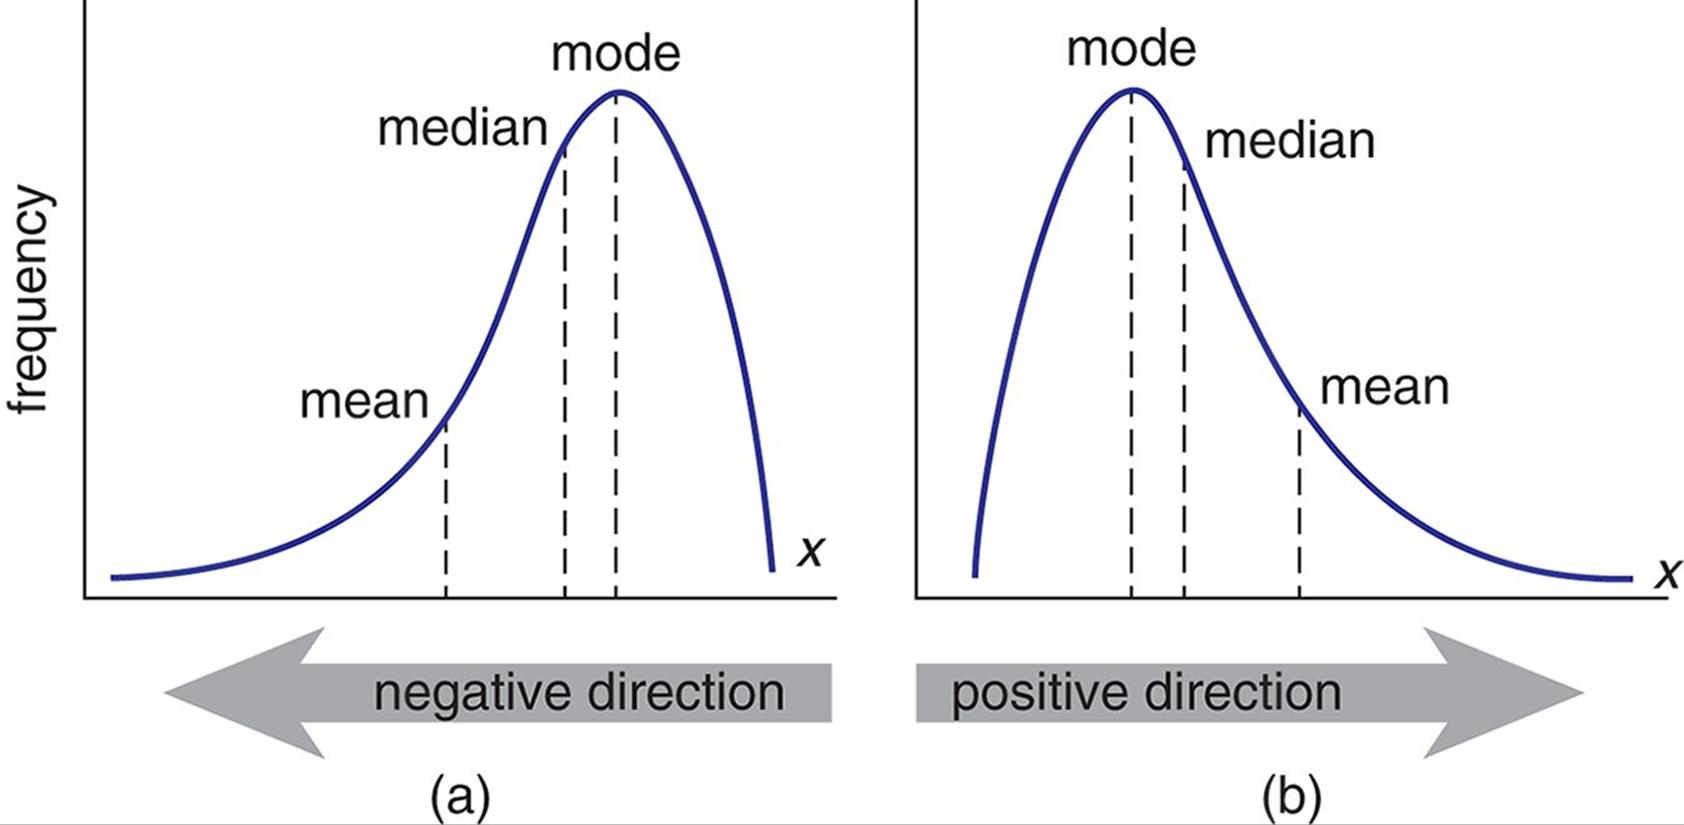

In [19]:
display(Image(filename='AI Specialist Lesson 02/Missing Value 02.jpg'))

In [20]:
data01.dtypes.values # data.dtypes: Trả về dtypes của từng columns dạng Series

array([dtype('int64'), dtype('O'), dtype('float64'), dtype('int64'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'),
       dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('O'), dtype('int64'), dtype('O'),
       dtype('int64'), dtype('O'), dtype('O'), dtype('float64'),
       dtype('O'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O'),
       dtype('O'), dtype('int64'

In [21]:
data01.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

>* Columns trong Dataframe data01 có tổng cộng 3 loại: int64, 'O', float64.
* Kiểu int64 và float64 thuộc kiểu numberic.

In [22]:
# Find missing category columns and missing number columns
def find_Missing_Catcols(data):
  miss_DF = find_missing_percent(data)
  Missing_Columns = list(miss_DF['ColumnNames'])
  Missing_Catcols = [col for col in data.columns if data[col].dtypes in ['O'] and col in Missing_Columns]
  return Missing_Catcols

def find_Missing_Numcols(data):
  miss_DF = find_missing_percent(data)
  Missing_Columns = list(miss_DF['ColumnNames'])
  Missing_Numcols = [col for col in data.columns if data[col].dtypes not in ['O'] and col in Missing_Columns]
  return Missing_Numcols

In [23]:
Missing_Catcols = find_Missing_Catcols(data01)
print(Missing_Catcols)
Missing_Numcols = find_Missing_Numcols(data01)
print(Missing_Numcols)

['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [24]:
data01['BsmtQual'].mode()

0    TA
Name: BsmtQual, dtype: object

In [25]:
def mean_imputation(data, missing_numerical_cols):
  for col in missing_numerical_cols:
    data[col] = data[col].fillna(data[col].mean()) # (data[col].mean() ở đây sẽ tính dựa trên những những phần tử khác NaN trong columns
  return data

def mode_imputation(data, missing_categorical_cols):
  for col in missing_categorical_cols:
    data[col] = data[col].fillna(data[col].mode().iloc[0])
  return data

In [26]:
data_app02 = mean_imputation(data01, Missing_Numcols)
data_app02 = mode_imputation(data01, Missing_Catcols)

print(data_app02.shape)
miss_DF_app02 = find_missing_percent(data_app02)
display(miss_DF_app02)

(1460, 76)


,ColumnNames,TotalMissingValues,PercentMissing


##### **4.3 Approach 03: Impute missing by Group using group statistics: Mean, Median, Mode**
* Thay thế missing bằng các giá trị thống kê của các nhóm nhỏ trong data.

>Với các columns có missing, cần tìm các cột có tương quan mạnh nhất với nó để imputation. Để tìm correlation các columns phải ở dạng số.
==> Encode các categorical columns thành dạng số.

* **Encode và decode các categorical columns.**
* **Việc encode chỉ dùng cho việc tính correlation matrix, còn lại các bước khác ko dùng tới data_encode.**

In [29]:
# Các column thuộc kiểu number và category của data01
Cat_Cols = [col for col in data01.columns if data01[col].dtypes in ['O']]
Num_Cols = [col for col in data01.columns if data01[col].dtypes not in ['O']]
print(Cat_Cols)
print(Num_Cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Pool

In [89]:
from sklearn.preprocessing import OrdinalEncoder

def Encode_CatCols(data, Categorical_Cols):
  enc_dict = {}
  data_encode = data.copy()
  for col in Categorical_Cols:
    enc = OrdinalEncoder()
    data_encode[col] = enc.fit_transform(data_encode[[col]])
    enc_dict[col] = enc
  return data_encode, enc_dict

def Decode_CatCols(data_encode, OrdinalEncoder_dict, Categorical_Cols):
  data_decode = data_encode.copy()
  for col in Categorical_Cols:
    data_decode[col] = OrdinalEncoder_dict[col].inverse_transform(data_encode[[col]])
  return data_decode

In [90]:
data_encode_app03, enc_dict = Encode_CatCols(data01, Cat_Cols)
display(data_encode_app03.head())
print(enc_dict)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3.0,65.0,8450,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,2003,2003,1.0,1.0,12.0,13.0,1.0,196.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,706,5.0,0,150,856,1.0,0.0,1.0,4.0,856,854,0,1710,1,0,2,1,3,1,2.0,8,6.0,0,2.0,1.0,2003.0,1.0,2,548,4.0,4.0,2.0,0,61,0,0,0,0,0,2,2008,8.0,4.0,208500
1,20,3.0,80.0,9600,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,6,8,1976,1976,1.0,1.0,8.0,8.0,2.0,0.0,3.0,4.0,1.0,2.0,3.0,1.0,0.0,978,5.0,0,284,1262,1.0,0.0,1.0,4.0,1262,0,0,1262,0,1,2,0,3,1,3.0,6,6.0,1,4.0,1.0,1976.0,1.0,2,460,4.0,4.0,2.0,298,0,0,0,0,0,0,5,2007,8.0,4.0,181500
2,60,3.0,68.0,11250,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,2001,2002,1.0,1.0,12.0,13.0,1.0,162.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,486,5.0,0,434,920,1.0,0.0,1.0,4.0,920,866,0,1786,1,0,2,1,3,1,2.0,6,6.0,1,4.0,1.0,2001.0,1.0,2,608,4.0,4.0,2.0,0,42,0,0,0,0,0,9,2008,8.0,4.0,223500
3,70,3.0,60.0,9550,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,7,5,1915,1970,1.0,1.0,13.0,15.0,2.0,0.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,216,5.0,0,540,756,1.0,2.0,1.0,4.0,961,756,0,1717,1,0,1,0,3,1,2.0,7,6.0,1,2.0,5.0,1998.0,2.0,3,642,4.0,4.0,2.0,0,35,272,0,0,0,0,2,2006,8.0,0.0,140000
4,60,3.0,84.0,14260,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,8,5,2000,2000,1.0,1.0,12.0,13.0,1.0,350.0,2.0,4.0,2.0,2.0,3.0,0.0,2.0,655,5.0,0,490,1145,1.0,0.0,1.0,4.0,1145,1053,0,2198,1,0,2,1,4,1,2.0,9,6.0,1,4.0,1.0,2000.0,1.0,3,836,4.0,4.0,2.0,192,84,0,0,0,0,0,12,2008,8.0,4.0,250000


{'MSZoning': OrdinalEncoder(), 'Street': OrdinalEncoder(), 'LotShape': OrdinalEncoder(), 'LandContour': OrdinalEncoder(), 'Utilities': OrdinalEncoder(), 'LotConfig': OrdinalEncoder(), 'LandSlope': OrdinalEncoder(), 'Neighborhood': OrdinalEncoder(), 'Condition1': OrdinalEncoder(), 'Condition2': OrdinalEncoder(), 'BldgType': OrdinalEncoder(), 'HouseStyle': OrdinalEncoder(), 'RoofStyle': OrdinalEncoder(), 'RoofMatl': OrdinalEncoder(), 'Exterior1st': OrdinalEncoder(), 'Exterior2nd': OrdinalEncoder(), 'MasVnrType': OrdinalEncoder(), 'ExterQual': OrdinalEncoder(), 'ExterCond': OrdinalEncoder(), 'Foundation': OrdinalEncoder(), 'BsmtQual': OrdinalEncoder(), 'BsmtCond': OrdinalEncoder(), 'BsmtExposure': OrdinalEncoder(), 'BsmtFinType1': OrdinalEncoder(), 'BsmtFinType2': OrdinalEncoder(), 'Heating': OrdinalEncoder(), 'HeatingQC': OrdinalEncoder(), 'CentralAir': OrdinalEncoder(), 'Electrical': OrdinalEncoder(), 'KitchenQual': OrdinalEncoder(), 'Functional': OrdinalEncoder(), 'FireplaceQu': Ordina

In [91]:
data_decode_app03 = Decode_CatCols(data_encode_app03, enc_dict, Cat_Cols)
display(data_decode_app03.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


* **Tìm tương quan của các Missing Categorical columns đôi một với nhau**

In [42]:
print(Missing_Catcols)
print(Cat_Cols)

['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [46]:
CorrCol = data_encode_app03[Cat_Cols].corr()['MasVnrType'].sort_values(ascending = False).keys()[1]
print(CorrCol)

GarageType


In [51]:
Corr_matrix = data_encode_app03[Missing_Catcols].corr()
display(Corr_matrix)

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond
MasVnrType,1.000000,-0.105566,-0.041926,-0.024861,0.074709,0.020943,-0.063977,-0.188047,0.113015,0.048629,-0.062807,-0.058827
BsmtQual,-0.105566,1.000000,0.004624,0.281859,-0.021140,-0.098320,-0.157626,0.034103,0.230133,0.468205,-0.047523,-0.047325
BsmtCond,-0.041926,0.004624,1.000000,-0.031545,-0.078587,0.035400,0.111322,0.019096,-0.064862,-0.067341,0.038638,0.150734
BsmtExposure,-0.024861,0.281859,-0.031545,1.000000,0.179300,0.063741,-0.130056,0.029025,0.199299,0.231417,-0.077866,-0.057769
BsmtFinType1,0.074709,-0.021140,-0.078587,0.179300,1.000000,0.154696,-0.144603,-0.065133,0.157460,0.066727,-0.111947,-0.101280
BsmtFinType2,0.020943,-0.098320,0.035400,0.063741,0.154696,1.000000,-0.017538,-0.048057,0.018694,-0.028343,-0.032608,0.004043
Electrical,-0.063977,-0.157626,0.111322,-0.130056,-0.144603,-0.017538,1.000000,0.086589,-0.156106,-0.231163,0.109257,0.119467
FireplaceQu,-0.188047,0.034103,0.019096,0.029025,-0.065133,-0.048057,0.086589,1.000000,-0.149537,-0.142790,0.028662,0.065015
GarageType,0.113015,0.230133,-0.064862,0.199299,0.157460,0.018694,-0.156106,-0.149537,1.000000,0.421422,-0.219632,-0.220106
GarageFinish,0.048629,0.468205,-0.067341,0.231417,0.066727,-0.028343,-0.231163,-0.142790,0.421422,1.000000,-0.153777,-0.130269


* **Crosstab trong pandas tạo mapping table.**

In [53]:
MapTalble = pd.crosstab(data01['MasVnrType'], data01[CorrCol])
display(MapTalble)

GarageType,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd
MasVnrType,,,,,,
BrkCmn,0,10,0,0,2,3
BrkFace,3,349,8,34,0,51
None,2,493,10,36,7,324
Stone,1,99,1,18,0,9


In [59]:
MapTalble['Attchd'].idxmax() # Trả về index của giá trị max

'None'

* **Tạo Map dictionary từ Mapping table.**

In [68]:
print(Missing_Catcols)

['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [62]:
Items = data01[CorrCol].unique()
MapDict = {}
for item in Items:
  if item is np.nan:
    MapDict[item] = data01[Cat_Cols].mode().iloc[0]
  else:
    MapDict[item] = MapTalble[item].idxmax()
print(MapDict)

{'Attchd': 'None', 'Detchd': 'None', 'BuiltIn': 'None', 'CarPort': 'None', 'Basment': 'None', '2Types': 'BrkFace'}


* **Thay thế missing trong CatCol**

In [83]:
catcol = 'MasVnrType'
data02 = data.copy()
Nan_List_Index = data02[data02[catcol].isnull()].index
print(Nan_List_Index)

for idx in Nan_List_Index:
  data02.loc[idx, catcol] = MapDict[data02.loc[idx, CorrCol]]

print(data02[catcol].isnull().sum())

Int64Index([234, 529, 650, 936, 973, 977, 1243, 1278], dtype='int64')
0


* **Viết gọn lại thành các hàm hoàn chỉnh**

In [94]:
# Tìm ra 1 column có tương quan mạnh nhất với column mà ta đang muốn xử lý
def find_Corr_Featue_MapDict(data, catcol):
  catcols = [col for col in data.columns if data[col].dtypes in ['O']]
  data_encode, enc_dict = Encode_CatCols(data, catcols)
  data_decode = Decode_CatCols(data_encode, enc_dict, catcols)

  corr_col = data_encode[catcols].corr()[catcol].sort_values(ascending=False).keys()[1]
  map_table = pd.crosstab(data_decode[catcol], data_decode[corr_col])

  map_dict = {}
  items = data_decode[corr_col].unique()
  for item in items:
    if item is np.nan:
      map_dict[item] = data_decode[catcol].mode().iloc[0]
    else:
      map_dict[item] = map_table[item].idxmax()
  print(MapDict)
  return corr_col, map_dict

In [95]:
corr_col, map_dict = find_Corr_Featue_MapDict(data02, catcol='MasVnrType')
print(corr_col)
print(map_dict)

{'Attchd': 'None', 'Detchd': 'None', 'BuiltIn': 'None', 'CarPort': 'None', 'Basment': 'None', '2Types': 'BrkFace'}
PoolQC
{nan: 'None', 'Ex': 'None', 'Fa': 'BrkFace', 'Gd': 'None'}


In [ ]:
for col in Missing_Catcols:

##### **4.4 Approch 04: Impute missing using Machine Learning (XGBoost)**

##### **4.5 Approach 05: Impute missing using Mice**